In [ ]:
%pip install -q sklearn

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#from subprocess import check_output #it was in code that I got, it might be usefull for windows users
#print(check_output(["ls", "."]).decode("utf8"))

# read the data

bg_dt = pd.read_csv('data/all_chr.H.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', index_col = 0) #read data
bg_dt2 = bg_dt.T # transpose data
del(bg_dt)
bg_dt2.index.name = 'SampleID' #change index name to merge later with the manifest
bg_dt2.iloc[1:10,1:10] # check into first ten rows, all looks ok

chr_pos_ref_alt,1:58771:T:C,1:183401:C:G,1:186291:G:A,1:281912:C:G,1:531693:C:T,1:663390:T:C,1:689966:T:C,1:734153:G:C,1:813885:G:A
SampleID,,,,,,,,,
HG00097,1|1,0|0,0|0,0|0,1|1,0|0,0|0,0|0,1|1
HG00099,0|0,0|0,1|0,0|0,0|1,0|0,0|0,0|0,1|1
HG00100,1|0,0|0,0|0,0|0,1|0,0|0,0|0,0|0,1|1
HG00101,1|0,0|0,0|0,1|0,0|1,0|0,0|0,0|0,1|0
HG00102,1|1,0|0,0|0,1|0,0|0,0|0,0|0,1|0,1|1
HG00103,0|0,0|0,0|0,0|0,1|1,0|0,0|0,0|0,1|1
HG00105,0|1,0|0,0|0,1|0,0|0,0|0,0|0,0|0,1|1
HG00106,0|1,0|1,0|0,0|0,0|1,0|0,1|0,0|1,1|0
HG00107,1|0,0|0,0|0,1|0,1|1,1|0,0|0,0|0,0|0


In [2]:

# read the manifest file

manifest = pd.read_csv('data/manifest.txt', sep = " ", index_col= 1) # read the manifest
print(manifest.head) # fyi how it looks
manifest = manifest.loc[:,'Population'] # leave only Pop
print(manifest.head) # looks fine
bg_dt3 = pd.merge(manifest,bg_dt2, left_index=True, right_index=True) # merge with the data by indices
del(bg_dt2)
bg_dt3

<bound method NDFrame.head of          FamilyID FatherID MotherID  Sex Population Superpopulation
SampleID                                                           
HG00096   HG00096        0        0    1        GBR             EUR
HG00097   HG00097        0        0    2        GBR             EUR
HG00099   HG00099        0        0    2        GBR             EUR
HG00100   HG00100        0        0    2        GBR             EUR
HG00101   HG00101        0        0    1        GBR             EUR
...           ...      ...      ...  ...        ...             ...
NA21137   NA21137        0        0    2        GIH             SAS
NA21141   NA21141        0        0    2        GIH             SAS
NA21142   NA21142        0        0    2        GIH             SAS
NA21143   NA21143        0        0    2        GIH             SAS
NA21144   NA21144        0        0    2        GIH             SAS

[3202 rows x 6 columns]>
<bound method NDFrame.head of SampleID
HG00096    GBR
HG0009

,Population,1:17222:A:G,1:58771:T:C,1:183401:C:G,1:186291:G:A,1:281912:C:G,1:531693:C:T,1:663390:T:C,1:689966:T:C,1:734153:G:C,...,22:50509881:A:G,22:50555369:G:C,22:50592780:G:C,22:50665742:A:G,22:50717650:G:A,22:50740572:C:A,22:50768105:T:C,22:50768106:T:G,22:50787916:C:T,22:50807426:C:T
SampleID,,,,,,,,,,,,,,,,,,,,,
HG00096,GBR,0|0,1|0,0|0,0|0,0|0,1|1,0|0,0|0,0|0,...,0|0,1|1,1|1,1|1,0|0,0|1,1|0,0|0,1|0,0|0
HG00097,GBR,0|0,1|1,0|0,0|0,0|0,1|1,0|0,0|0,0|0,...,0|0,1|1,1|1,0|0,0|0,1|0,0|1,0|0,0|1,0|0
HG00099,GBR,0|0,0|0,0|0,1|0,0|0,0|1,0|0,0|0,0|0,...,1|1,0|0,0|1,1|0,1|0,0|0,1|1,0|0,1|0,0|0
HG00100,GBR,0|0,1|0,0|0,0|0,0|0,1|0,0|0,0|0,0|0,...,1|1,0|0,1|0,1|1,1|0,0|0,0|1,0|0,0|0,0|0
HG00101,GBR,0|1,1|0,0|0,0|0,1|0,0|1,0|0,0|0,0|0,...,0|1,0|0,0|1,0|1,1|1,0|0,0|1,0|0,0|1,0|0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,GIH,0|1,0|1,0|0,1|0,0|1,1|1,0|0,0|0,0|0,...,0|0,0|0,1|0,1|1,0|0,1|0,1|1,0|0,0|1,0|0
NA21141,GIH,0|0,1|0,0|1,0|0,0|0,0|1,0|0,0|0,0|0,...,0|0,0|1,1|1,1|0,0|0,0|1,0|0,0|0,1|0,0|0
NA21142,GIH,0|1,1|1,0|0,0|0,0|0,0|1,0|0,0|0,0|0,...,0|0,0|1,0|1,0|1,0|0,1|1,0|0,0|0,0|1,0|1


In [3]:

# read the samples that fall into train

smpl_list = pd.read_csv('data/samples.2561.txt', header=None, index_col = 0) # read samples to be subsetted
print(smpl_list.head) # check how they look, they are indexes here
print(bg_dt3.shape) # check the shape of the previos data, 3202 samples and 62.9K SNPs + Pop

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: [HG02330, HG02471, HG02470, HG02580, HG01896, HG01887, HG02511, HG01985, HG01882, HG02308, HG01888, HG02479, HG02258, HG02145, HG02545, HG02501, HG02477, HG02323, HG01960, HG02497, HG02554, HG02496, HG01879, HG02143, HG02557, HG01989, HG02144, HG01956, HG02095, HG02325, HG02107, HG02489, HG02485, HG01886, HG01986, HG01883, HG02419, HG02052, HG02282, HG02508, HG02455, HG02439, HG02536, HG02010, HG02255, HG01915, HG02011, HG02318, HG02334, HG01987, HG01916, HG01914, HG02280, HG02314, HG02009, HG02322, HG01959, HG01890, HG01912, HG02257, HG02420, HG01885, HG02332, HG02051, HG02476, HG01958, HG02537, HG02316, HG02450, HG02427, HG02111, HG02281, HG02429, HG01889, HG02546, HG01990, HG02055, HG02315, HG02012, HG02442, HG02108, HG01891, HG02337, HG01897, HG02555, HG02558, HG02481, HG02256, HG02502, HG01880, HG02317, HG01988, HG02343, NA19828, NA19908, NA20321, NA20274, NA20356, NA20332, NA19984, ...]

[2561 rows x 0 columns]>
(32

In [4]:

# leave only train, safe Y train

train=bg_dt3[bg_dt3.index.isin(smpl_list.index)] # subset the train via train samples
train_Y = train.loc[:,'Population'] # get Y stay alone
train_Y = train_Y.to_frame()
train_Y.index = range(0,2561) # change to merge it later

train = train.drop('Population', axis = 1) # remove Y from data
print(train.iloc[0:10,0:10]) # check that all is fine

         1:17222:A:G 1:58771:T:C 1:183401:C:G 1:186291:G:A 1:281912:C:G  \
SampleID                                                                  
HG00096          0|0         1|0          0|0          0|0          0|0   
HG00099          0|0         0|0          0|0          1|0          0|0   
HG00100          0|0         1|0          0|0          0|0          0|0   
HG00101          0|1         1|0          0|0          0|0          1|0   
HG00102          0|0         1|1          0|0          0|0          1|0   
HG00103          0|0         0|0          0|0          0|0          0|0   
HG00105          0|0         0|1          0|0          0|0          1|0   
HG00107          0|0         1|0          0|0          0|0          1|0   
HG00108          0|0         0|1          0|0          0|0          0|0   
HG00109          0|0         0|0          0|0          0|0          0|0   

         1:531693:C:T 1:663390:T:C 1:689966:T:C 1:734153:G:C 1:813885:G:A  
SampleID               

In [5]:

# recode all genotypes to 0 1 2

train = train.replace(['0|0'], '0')
train = train.replace(['0|1',"1|0"], '1')
train = train.replace(['1|1'], '2')
print(train.iloc[0:10,0:10])

         1:17222:A:G 1:58771:T:C 1:183401:C:G 1:186291:G:A 1:281912:C:G  \
SampleID                                                                  
HG00096            0           1            0            0            0   
HG00099            0           0            0            1            0   
HG00100            0           1            0            0            0   
HG00101            1           1            0            0            1   
HG00102            0           2            0            0            1   
HG00103            0           0            0            0            0   
HG00105            0           1            0            0            1   
HG00107            0           1            0            0            1   
HG00108            0           1            0            0            0   
HG00109            0           0            0            0            0   

         1:531693:C:T 1:663390:T:C 1:689966:T:C 1:734153:G:C 1:813885:G:A  
SampleID               

In [6]:
# simple normalisation, I guess I could use StandartScaller, but anyway

train = train.apply(pd.to_numeric) # to numeric
mu = train.mean(axis=(0)) # general mean
std = train.std(axis=(0)) # sd
train_norm = (train - mu)/std # normalisation
#X_test_norm = (X_test - mu)/std # someday the same to the test
#mu # I checked that all looks good

print(train.info()) # and additional check the previos and norm datasets
print(train_norm.iloc[0:10,0:10])

<class 'pandas.core.frame.DataFrame'>
Index: 2561 entries, HG00096 to NA21144
Columns: 62899 entries, 1:17222:A:G to 22:50807426:C:T
dtypes: int64(62899)
memory usage: 1.2+ GB
None
          1:17222:A:G  1:58771:T:C  1:183401:C:G  1:186291:G:A  1:281912:C:G  \
SampleID                                                                       
HG00096     -0.406959     0.666236      -0.39052     -0.350332     -0.598513   
HG00099     -0.406959    -0.894816      -0.39052      2.808825     -0.598513   
HG00100     -0.406959     0.666236      -0.39052     -0.350332     -0.598513   
HG00101      2.456289     0.666236      -0.39052     -0.350332      1.312698   
HG00102     -0.406959     2.227287      -0.39052     -0.350332      1.312698   
HG00103     -0.406959    -0.894816      -0.39052     -0.350332     -0.598513   
HG00105     -0.406959     0.666236      -0.39052     -0.350332      1.312698   
HG00107     -0.406959     0.666236      -0.39052     -0.350332      1.312698   
HG00108     -0.4069

In [7]:
# workarond: PCA doesn't work since some SNPs had NaN after norm, it seemed they had 0|0 across all samples in train
# but I chose the SNPs used train... anyway, I decided to simple remoce them since it's not many of them

vec = train_norm.isna().any() # the vector contains info if the column contains NaN
vec_T = vec[vec == True] # only TRUE
print(vec_T.index, len(vec_T.index)) # their names and amount

Index(['1:10248540:T:A', '4:22686119:T:A', '4:174674903:T:G', '6:87801487:G:T',
       '6:88803218:T:A', '8:129694056:G:A', '9:27548938:T:C', '9:99352025:C:A',
       '9:121542334:A:T', '11:56953217:A:C', '14:57763802:G:A',
       '15:90603252:C:A', '22:39351776:G:C'],
      dtype='object') 13


In [8]:
# remove these bad snps from our data

train_norm = train_norm.drop(vec_T.index, axis=1)
train_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2561 entries, HG00096 to NA21144
Columns: 62886 entries, 1:17222:A:G to 22:50807426:C:T
dtypes: float64(62886)
memory usage: 1.2+ GB


In [9]:
# doing this all to the test set
test_list = pd.read_csv('data/samples.641.test.txt', header=None, index_col = 0) # read samples to be subsetted
test=bg_dt3[bg_dt3.index.isin(test_list.index)] # subset test using test samples
Y_test = test.loc[:,'Population'] # get Y stay alone
Y_test = Y_test.to_frame()
Y_test.index = range(0,641) # change to merge it later

test = test.drop('Population', axis = 1) # remove Y from data
test = test.replace(['0|0'], '0')
test = test.replace(['0|1',"1|0"], '1')
test = test.replace(['1|1'], '2')

test = test.apply(pd.to_numeric) # to numeric
mu_test = test.mean(axis=(0)) # general mean
std_test = test.std(axis=(0)) # sd
test_norm = (test - mu_test)/std_test # normalisation

vec = test_norm.isna().any() # the vector contains info if the column contains NaN
vec_T = vec[vec == True] # only TRUE
test_norm = test_norm.drop(vec_T.index, axis=1)

In [10]:
# only take intersection between train and test to enable PCA
shared_cols = np.intersect1d(train_norm.columns, test_norm.columns)
test_norm = test_norm[shared_cols]
train_norm = train_norm[shared_cols]

In [11]:
test_norm.shape

(641, 62481)

In [12]:
train_norm.shape

(2561, 62481)

In [ ]:
#np.any(np.isnan(train_norm)) #
#train.loc[:,'8:15424631:C:G'].mean() # just look inside one of these SNPs

In [13]:
train_norm

,10:100002628:A:C,10:100065403:C:G,10:100108590:T:A,10:100239637:A:G,10:100278928:T:A,10:100313285:G:A,10:10032727:A:C,10:100339336:C:A,10:100392540:T:C,10:100416161:G:T,...,9:99169487:G:A,9:99321756:A:C,9:99352024:C:G,9:99401604:T:A,9:9945265:C:A,9:99460489:A:C,9:99512284:G:C,9:9975058:C:G,9:99871170:G:T,9:99943194:C:T
SampleID,,,,,,,,,,,,,,,,,,,,,
HG00096,0.119956,-1.094838,-1.614460,-1.444899,-1.182521,1.199271,-0.020529,-0.026289,-0.932930,0.785473,...,0.430716,0.012906,1.393065,-0.175878,1.361558,-0.251062,-1.103062,1.325186,1.349854,1.429886
HG00099,0.119956,0.305002,-0.236249,-0.090934,0.158682,-0.212836,-0.020529,1.347691,0.549225,-0.816117,...,-1.022595,0.012906,1.393065,-0.175878,1.361558,-1.645789,-1.103062,1.325186,0.005250,1.429886
HG00100,-1.245407,0.305002,-0.236249,-1.444899,-1.182521,1.199271,-0.020529,1.347691,-0.932930,0.785473,...,0.430716,0.012906,0.010795,1.201567,-1.375451,1.143666,-1.103062,1.325186,1.349854,-1.270659
HG00101,-1.245407,-1.094838,-1.614460,-1.444899,-1.182521,1.199271,-0.020529,1.347691,0.549225,0.785473,...,0.430716,0.012906,1.393065,-0.175878,-1.375451,-0.251062,-1.103062,-1.383355,1.349854,0.079614
HG00102,0.119956,-1.094838,-1.614460,-1.444899,-1.182521,-0.212836,1.362985,-1.400268,-0.932930,0.785473,...,0.430716,1.390081,1.393065,-1.553323,-0.006947,-1.645789,-1.103062,1.325186,0.005250,1.429886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21135,-1.245407,-1.094838,-1.614460,-1.444899,-1.182521,-0.212836,-0.020529,-0.026289,0.549225,0.785473,...,-1.022595,-1.364269,-1.371475,-0.175878,1.361558,1.143666,0.304483,1.325186,0.005250,1.429886
NA21137,0.119956,0.305002,-0.236249,-0.090934,0.158682,1.199271,-0.020529,1.347691,0.549225,-0.816117,...,-1.022595,-1.364269,1.393065,1.201567,-0.006947,-0.251062,0.304483,1.325186,0.005250,-1.270659
NA21142,0.119956,-1.094838,-1.614460,-1.444899,-1.182521,1.199271,-1.404042,-0.026289,-0.932930,0.785473,...,0.430716,0.012906,0.010795,-0.175878,-0.006947,1.143666,-1.103062,1.325186,-1.339354,1.429886


In [14]:
# EVentually, PCA on train! with 0.9 explained variation

from sklearn.decomposition import PCA
pca_09 = PCA(n_components=0.9)
pca_09.fit(train_norm)
train_norm_new_coord = pca_09.transform(train_norm)

In [15]:
pca_09.explained_variance_ratio_

array([0.04597808, 0.02882593, 0.01144592, ..., 0.00025096, 0.00025073,
       0.00025065])

Text(0, 0.5, 'pct variance explained')

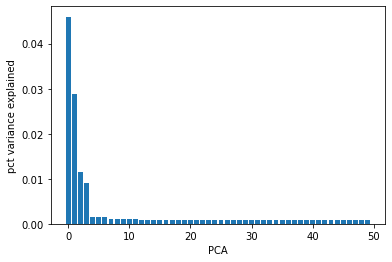

In [16]:
import matplotlib.pyplot as plt
plt.bar(range(0,50), pca_09.explained_variance_ratio_[0:50])
plt.xlabel('PCA')
plt.ylabel('pct variance explained')

In [23]:
sum(pca_09.explained_variance_ratio_[0:200])

0.24000751929210884

In [24]:
test_pca = pca_09.transform(test_norm)

In [28]:
# do a dataset, add normal colnames

toplot = pd.DataFrame(train_norm_new_coord) # nparray to df; I just get used to work with df
toplot.columns = ["PC" + str(x) for x in range(1,1898)] # new colnames since right now colnames are RangeIndices
#train_Y.index.name = None
toplot = toplot.join(train_Y)
toplot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1889,PC1890,PC1891,PC1892,PC1893,PC1894,PC1895,PC1896,PC1897,Population
0,-28.009151,-55.778326,5.320055,-25.635387,0.013132,0.376456,6.373122,-1.259911,-8.275107,-2.490587,...,2.058322,-1.754863,-0.988218,-4.694735,0.641004,2.690830,-8.248366,7.784506,-2.968592,GBR
1,-29.492721,-58.013511,6.123854,-23.760345,-0.628108,-3.252103,9.324609,-4.057414,-13.267440,-1.332661,...,-3.671525,-10.370520,3.454612,-8.173760,-1.866619,-6.518198,4.593784,-13.871494,2.466476,GBR
2,-26.153484,-57.588144,6.355908,-23.927943,1.237214,-4.511244,8.251774,-12.248330,0.013765,-3.879205,...,8.053617,-4.130636,-2.002932,-3.466123,3.484138,-3.518955,-5.830815,4.473137,9.962040,GBR
3,-27.422443,-56.243648,9.457952,-22.226520,0.909463,-3.724220,9.143316,-12.694955,-11.335033,-2.012616,...,-2.885330,4.820207,2.321186,0.566852,0.435192,4.136984,0.185019,3.708626,-5.398145,GBR
4,-28.294603,-56.812330,4.587929,-21.335692,6.877772,-5.433940,9.062108,6.043382,5.209645,-0.420290,...,2.726749,-6.169708,8.390464,-3.956383,-1.123828,-8.700717,-0.718742,-6.146622,-11.044491,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,-25.323193,-16.042116,-43.622124,30.775755,0.912123,0.553508,-1.007788,-11.674546,-4.465031,-4.627360,...,2.239476,-3.223007,0.974582,8.287940,2.799053,-6.996094,-2.578169,3.711490,-3.342607,GIH
2557,-25.506447,-16.366411,-39.852153,31.856352,-0.093413,0.432038,2.880473,7.224063,-5.400054,-0.431764,...,-11.778684,-4.700075,2.960813,-1.044807,-2.803787,5.805572,4.494941,-3.180729,-0.273308,GIH
2558,-28.285878,-15.069907,-44.784398,30.724730,0.270455,-1.611247,1.549536,-8.860179,5.031879,-7.585579,...,4.876404,-2.067339,4.084035,-0.526359,-3.928097,7.744834,-0.854683,8.427332,-3.540168,GIH
2559,-29.424004,-12.503126,-45.640421,33.734422,-2.401510,-0.366555,0.358915,1.679761,5.427538,-5.128124,...,-4.044309,6.540455,2.191640,2.181867,-1.332916,3.653135,-4.350202,4.080545,0.607283,GIH


In [30]:
df_test = pd.DataFrame(test_pca) # nparray to df; I just get used to work with df
df_test.columns = ["PC" + str(x) for x in range(1,1898)] # new colnames since right now colnames are RangeIndices
#train_Y.index.name = None
X_test = df_test.copy()
df_test = df_test.join(Y_test)
df_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1889,PC1890,PC1891,PC1892,PC1893,PC1894,PC1895,PC1896,PC1897,Population
0,-29.054373,-56.977854,6.469758,-23.022313,-0.162787,1.090314,4.901587,5.326231,-8.898692,4.114263,...,2.278878,0.963637,-0.943538,-1.885588,0.154354,-1.934995,-0.213566,1.375615,0.074302,GBR
1,-31.824419,-58.113433,6.125055,-21.426083,-2.937581,0.559622,6.106051,-1.268158,-9.181299,-1.008670,...,-1.347256,-0.095806,-0.992166,1.275091,-1.939013,0.700294,2.052715,-0.276730,1.119040,GBR
2,-29.039489,-57.432125,6.764980,-21.990507,-1.434225,-1.515619,7.555365,4.716036,-7.896625,3.663297,...,0.954586,0.659779,-2.881245,-1.058386,1.878038,-1.007836,-0.787023,-1.205821,-0.840240,GBR
3,-27.220335,-56.203126,5.951581,-22.963095,1.722251,-2.016559,4.933356,-2.069434,-2.025968,-3.205795,...,-1.740320,1.318325,-1.180810,-0.383976,1.300539,1.324986,-1.382982,-1.286013,-1.553944,GBR
4,-28.833584,-56.673391,4.926491,-23.063967,3.018351,-2.901814,6.592747,5.850365,3.436214,2.543727,...,0.452247,2.098026,1.445872,0.183591,-2.164123,1.712677,-0.496079,-0.918255,0.512871,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,-27.141027,-15.908187,-45.433119,32.389660,-1.646462,-1.720801,0.285053,-0.056098,5.154096,-0.924961,...,-0.466317,0.010071,-1.940061,-1.192498,0.448525,-0.615746,0.642057,-0.753812,0.355270,GIH
637,-24.914879,-16.798219,-37.561392,26.975674,-0.639547,-1.092678,-2.013348,1.241820,9.033054,-2.614749,...,-1.109732,-1.079897,-1.291735,-1.523688,-0.075149,-1.066688,0.170322,0.171815,-1.285061,GIH
638,-26.917367,-14.961892,-41.333975,30.515505,1.441490,-0.886240,-0.317583,0.685082,-0.945762,-1.072109,...,1.016727,1.302378,-0.690402,-2.005545,-1.142879,-0.031144,1.300639,-0.185014,1.118398,GIH
639,-29.023316,-12.934009,-43.578180,31.409191,0.564626,-0.791231,-1.174222,-6.728180,-1.258123,-6.588781,...,2.384012,0.577484,-1.601621,0.053200,-1.123394,0.673508,-0.434434,0.844522,0.466763,GIH


In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
train, val = train_test_split(toplot, test_size = 0.20) 
X_train = train.drop('Population', axis=1, inplace=False)
X_val = val.drop('Population', axis=1, inplace=False)
y_train = train['Population']
y_val = val['Population']

In [32]:
train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1889,PC1890,PC1891,PC1892,PC1893,PC1894,PC1895,PC1896,PC1897,Population
1165,88.020941,13.684532,3.708015,-1.102736,-1.567731,43.194571,10.119770,1.752446,-8.506681,1.628576,...,-0.312494,-0.393049,1.839275,-0.376464,-0.265207,0.911397,1.573501,1.733718,-0.801760,GWD
1078,-30.529177,-25.694732,-29.539554,20.129669,1.563678,3.575359,2.507401,1.025893,-2.039680,4.436792,...,-5.948850,5.510576,-1.831893,-1.550117,-1.444871,1.846678,-2.298687,-7.863398,-1.585512,PJL
1732,-29.217611,-55.710584,5.324801,-23.220749,3.642504,-0.681576,10.220601,-10.333622,-15.160613,5.362472,...,0.038055,-0.807425,0.810189,1.411929,-0.715300,-1.491630,-0.339649,1.279854,-0.960258,CEU
1273,88.272930,12.367507,1.814896,-1.225222,-0.617129,-14.101088,-6.827280,4.749580,-16.389028,-5.641994,...,-2.494003,0.768287,1.789079,1.691884,1.669705,4.237305,3.462899,2.672946,2.584260,ESN
1378,91.075780,11.383859,0.607797,0.206608,0.365196,17.602037,2.565653,2.740806,-14.813111,1.035849,...,0.896337,0.325490,1.885287,1.735646,4.646239,-1.828569,-0.203240,3.527111,-1.397628,MSL


In [33]:
# given a model, report max cross-validated accuracy when limited to a variety of PCs
def cv_pca(model, scoring):
    
    # find CV accuracy for each PCA given in list
    pcs = [1,5,10,50,500,1000,1500,1898]
    acc = []
    for pc in pcs:
        model.fit(X_train.iloc[:,0:pc], y_train)
        curr_acc = sum(cross_val_score(model, X_train.iloc[:,0:pc], y_train, cv=4, scoring=scoring))/4
        acc.append(curr_acc)
        print(f"Model {str(model)}, PC {pc}: {round(curr_acc*100,4)}%")
        
    # find max accuracy from PCA list
    i_max = 0
    max_a = 0
    for i, a in enumerate(acc):
        tmp = np.mean(a)
        if(tmp>max_a):
            max_a = tmp
            i_max = i
            
    # train given model on these PCAs and report accuracy in train/test set
    opt_pca = pcs[i_max]
    return(opt_pca)

In [34]:
# given a base classification model and parameters, find optimal # of PCs to use (estimated using CV), and tune hyperparameters
def optimize(model, params, scoring, pc):
    
    # find optimal amount of PCs to use for given model using cross validation function
    opt_pc = pc
    
    # tune hyperparameters using grid search cross validation
    grid=GridSearchCV(estimator=model,param_grid=params,refit=True,verbose=1,cv=4,scoring=scoring)
    grid.fit(X_train.iloc[:, 0:opt_pc], y_train)
    opt_model = grid.best_estimator_
    
    # train model using optimal hyperparameters/PCs and obtain CV accuracy as well as test set accuracy
    acc_train = cross_val_score(opt_model, X_train.iloc[:,0:opt_pc], y_train, cv=4, scoring=scoring)
    opt_model.fit(X_train.iloc[:, :opt_pc], y_train)
    acc_test = scoring(opt_model, X_test.iloc[:, :opt_pc], Y_test)
    
    # return the optimal parameters, CV accuracy, test accuracy
    return([grid.best_params_, acc_train, acc_test])

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# store model string name, train/test accuracies and f1 scores, and hyperparameters
models = {}
models['Decision Tree'] = [
    DecisionTreeClassifier(ccp_alpha = 0.003095), # note that this alpha was found using optimized cost complexity pruning
    None,
    None,
    {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': ['5', '100', None]}
]
models['Logistic Regression'] = [
    LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    None,
    None,
    {'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['lbfgs', 'saga']}
]
models['XGBoost'] = [
    XGBClassifier(eta=0.1, verbosity = 0),
    None,
    None,
    {'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': ['5', '100', None]}
]
models['Neural Network'] = [
    MLPClassifier(solver='lbfgs', alpha=10, hidden_layer_sizes=(5, 2)),
    None,
    None,
    {'solver': ['adam', 'sgd', 'lbfgs'],'activation': ['logistic', 'relu']}
]
models['KNN'] = [
    KNeighborsClassifier(),
    None,
    None,
    {'n_neighbors':[2, 5, 15], 'weights': ['uniform', 'distance']}
]
models['SVC'] = [
    SVC(gamma='auto'),
    None,
    None,
    {'kernel': ['rbf', 'poly', 'sigmoid']}
]

# loop through all models and optimize, reporting best hyperparameters, accuracies, and execution time
for m in models:
    start_time = time.time()
    model = models[m][0]
    params = models[m][3]
    opt_pc = cv_pca(model, make_scorer(f1_score, average='weighted'))
    models[m][1] = optimize(model, params, make_scorer(accuracy_score), opt_pc)
    models[m][2] = optimize(model, params, make_scorer(f1_score, average='weighted'), opt_pc)
    print(f"Model: {m}, with parameters: {models[m][1][0]}, accuracy train: {models[m][1][1]}, accuracy test: {models[m][1][2]}, opt pc: {opt_pc}")
    print("--- %s seconds ---" % (time.time() - start_time))
    

Model DecisionTreeClassifier(ccp_alpha=0.003095), PC 1: 25.1202%
Model DecisionTreeClassifier(ccp_alpha=0.003095), PC 5: 63.8425%
Model DecisionTreeClassifier(ccp_alpha=0.003095), PC 10: 78.2492%
Model DecisionTreeClassifier(ccp_alpha=0.003095), PC 50: 81.3782%
Model DecisionTreeClassifier(ccp_alpha=0.003095), PC 500: 81.2164%
Model DecisionTreeClassifier(ccp_alpha=0.003095), PC 1000: 79.3137%
Model DecisionTreeClassifier(ccp_alpha=0.003095), PC 1500: 80.4248%
Model DecisionTreeClassifier(ccp_alpha=0.003095), PC 1898: 79.9954%
Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.2s finished


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.1s finished


Model: Decision Tree, with parameters: {'criterion': 'gini', 'max_depth': None}, accuracy train: [0.828125   0.8125     0.82421875 0.80273438], accuracy test: 0.7145085803432137, opt pc: 50
--- 43.81491804122925 seconds ---
Model LogisticRegression(max_iter=1000, multi_class='multinomial'), PC 1: 23.3077%
Model LogisticRegression(max_iter=1000, multi_class='multinomial'), PC 5: 63.8261%
Model LogisticRegression(max_iter=1000, multi_class='multinomial'), PC 10: 79.2041%
Model LogisticRegression(max_iter=1000, multi_class='multinomial'), PC 50: 83.0761%
Model LogisticRegression(max_iter=1000, multi_class='multinomial'), PC 500: 89.6822%
Model LogisticRegression(max_iter=1000, multi_class='multinomial'), PC 1000: 89.76%
Model LogisticRegression(max_iter=1000, multi_class='multinomial'), PC 1500: 89.0847%
Model LogisticRegression(max_iter=1000, multi_class='multinomial'), PC 1898: 86.9475%
Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 43.8min finished


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 48.2min finished


Model: Logistic Regression, with parameters: {'penalty': 'l2', 'solver': 'saga'}, accuracy train: [0.89648438 0.91210938 0.890625   0.9140625 ], accuracy test: 0.9141965678627145, opt pc: 1000
--- 7856.820445775986 seconds ---
Model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0), PC 1: 28.7482%
Model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 51.2min finished


Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 43.8min finished


Model: XGBoost, with parameters: {'gamma': 0.5, 'max_depth': '100'}, accuracy train: [0.90625    0.91015625 0.89257812 0.85546875], accuracy test: 0.7722308892355694, opt pc: 500
--- 8213.74668097496 seconds ---
Model MLPClassifier(alpha=10, hidden_layer_sizes=(5, 2), solver='lbfgs'), PC 1: 13.6166%
Model MLPClassifier(alpha=10, hidden_layer_sizes=(5, 2), solver='lbfgs'), PC 5: 11.9348%
Model MLPClassifier(alpha=10, hidden_layer_sizes=(5, 2), solver='lbfgs'), PC 10: 20.6265%
Model MLPClassifier(alpha=10, hidden_layer_sizes=(5, 2), solver='lbfgs'), PC 50: 28.8584%
Model MLPClassifier(alpha=10, hidden_layer_sizes=(5, 2), solver='lbfgs'), PC 500: 16.7366%
Model MLPClassifier(alpha=10, hidden_layer_sizes=(5, 2), solver='lbfgs'), PC 1000: 31.6846%
Model MLPClassifier(alpha=10, hidden_layer_sizes=(5, 2), solver='lbfgs'), PC 1500: 20.9718%
Model MLPClassifier(alpha=10, hidden_layer_sizes=(5, 2), solver='lbfgs'), PC 1898: 22.3412%
Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.4min finished


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.6min finished


Model: Neural Network, with parameters: {'activation': 'relu', 'solver': 'adam'}, accuracy train: [0.34570312 0.36328125 0.4375     0.27734375], accuracy test: 0.46801872074882994, opt pc: 1000
--- 337.23826360702515 seconds ---
Model KNeighborsClassifier(), PC 1: 27.9338%
Model KNeighborsClassifier(), PC 5: 67.4684%
Model KNeighborsClassifier(), PC 10: 77.0034%
Model KNeighborsClassifier(), PC 50: 77.9181%
Model KNeighborsClassifier(), PC 500: 73.0681%
Model KNeighborsClassifier(), PC 1000: 58.829%
Model KNeighborsClassifier(), PC 1500: 52.2923%
Model KNeighborsClassifier(), PC 1898: 39.0622%
Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.9s finished


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.0s finished


Model: KNN, with parameters: {'n_neighbors': 2, 'weights': 'distance'}, accuracy train: [0.83789062 0.86523438 0.84960938 0.8125    ], accuracy test: 0.7862714508580343, opt pc: 50
--- 28.639891624450684 seconds ---
Model SVC(gamma='auto'), PC 1: 27.7995%
Model SVC(gamma='auto'), PC 5: 57.679%
Model SVC(gamma='auto'), PC 10: 10.7082%
Model SVC(gamma='auto'), PC 50: 1.0892%
Model SVC(gamma='auto'), PC 500: 1.6054%
Model SVC(gamma='auto'), PC 1000: 1.1723%
Model SVC(gamma='auto'), PC 1500: 0.8113%
Model SVC(gamma='auto'), PC 1898: 0.8113%
Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 15.0min finished


Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 15.1min finished


Model: SVC, with parameters: {'kernel': 'poly'}, accuracy train: [0.64257812 0.68554688 0.66992188 0.65820312], accuracy test: 0.6287051482059283, opt pc: 5
--- 4985.000195264816 seconds ---


In [43]:
# create baseline model that predicts majority class
baseline_predict_test= ["CEU"] * len(Y_test)
baseline_test_acc = sum(a == b for a,b in zip(baseline_predict_test, Y_test.iloc[:, 0].tolist()))/len(Y_test)

baseline_predict_train= ["CEU"] * len(y_train)
baseline_train_acc = sum(a == b for a,b in zip(baseline_predict_train, y_train))/len(y_train)

# f1 score is based completely on precision (no false negatives)
baseline_f1_train = (2*baseline_train_acc)/(baseline_train_acc+1)
baseline_f1_test = (2*baseline_test_acc)/(baseline_test_acc+1)

In [44]:
# average accuracy/F1 from CV folds, prepare for plotting

model_names = []
means = []
f1s = []
stdevs = []
f1_stdevs = []
tests = []
f1_tests = []
for m in models:
    curr = models[m]
    cv_acc = curr[1][1]
    cv_f1 = curr[2][1]
    test_acc = curr[1][2]
    test_f1 = curr[2][2]

    model_names.append(m)
    means.append(np.mean(cv_acc))
    f1s.append(np.mean(cv_f1))
    stdevs.append(np.std(cv_acc))
    f1_stdevs.append(np.std(cv_f1))
    tests.append(test_acc)
    f1_tests.append(test_f1)
model_names.append("Baseline")
means.append(baseline_train_acc)
stdevs.append(0)
tests.append(baseline_test_acc)
f1s.append(baseline_f1_train)
f1_stdevs.append(0)
f1_tests.append(baseline_f1_test)

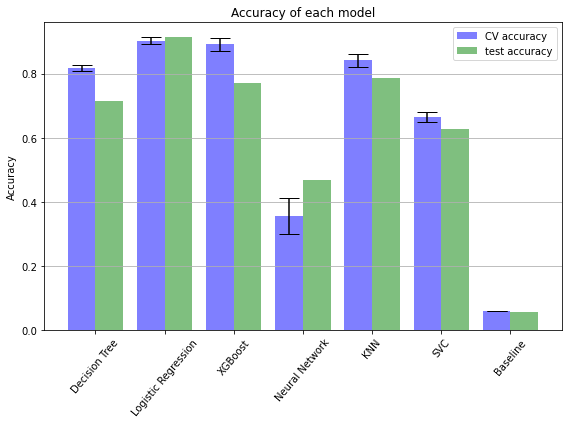

In [45]:
# plotting accuracy

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
x_pos = np.arange(len(model_names))
ax.bar(x_pos-0.2, means, yerr=stdevs, color='b', align='center', alpha=0.5, ecolor='black', capsize=10, width=0.4, 
       label="CV accuracy")
ax.bar(x_pos+0.2, tests, color='g',align='center', alpha=0.5, capsize=10, width=0.4,
      label="test accuracy")
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=50)
ax.set_title('Accuracy of each model')
plt.legend(loc="upper right")
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

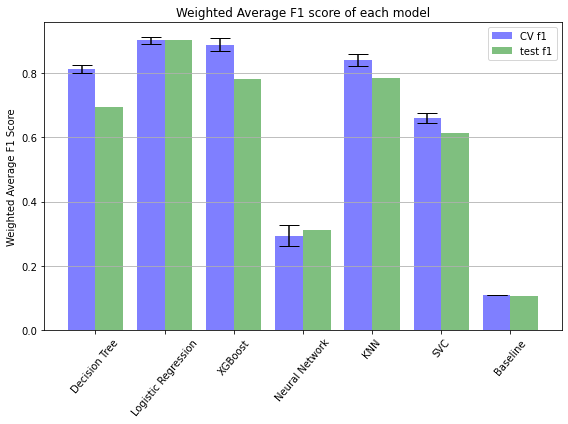

In [47]:
# plotting f1 scores

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
x_pos = np.arange(len(model_names))
ax.bar(x_pos-0.2, f1s, yerr=f1_stdevs, color='b', align='center', alpha=0.5, ecolor='black', capsize=10, width=0.4, 
       label="CV f1")
ax.bar(x_pos+0.2, f1_tests, color='g',align='center', alpha=0.5, capsize=10, width=0.4,
      label="test f1")
ax.set_ylabel('Weighted Average F1 Score')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=50)
ax.set_title('Weighted Average F1 score of each model')
plt.legend(loc="upper right")
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

In [53]:
for m in models:
    curr = models[m]
    print(f'{m} ---- {curr[1][0]}')

Decision Tree ---- {'criterion': 'gini', 'max_depth': None}
Logistic Regression ---- {'penalty': 'l2', 'solver': 'saga'}
XGBoost ---- {'gamma': 0.5, 'max_depth': '100'}
Neural Network ---- {'activation': 'relu', 'solver': 'adam'}
KNN ---- {'n_neighbors': 2, 'weights': 'distance'}
SVC ---- {'kernel': 'poly'}


In [ ]:
 LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    None,
    None,
    {'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['lbfgs', 'saga']}